# Part II - Two layer FC network Sigmoid function included

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)


K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H = 200  #Hidden layers
std=1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6

loss_history = []
train_acc_history = []
val_loss_history = []   #testing set loss history
val_acc_history = []     #testing set accuracy history

seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    a = x.dot(w1)+b1
    h = 1.0/(1+np.exp(-a))
    y_pred = h.dot(w2)+b2

    loss = 1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    accuracy =1/batch_size*(np.abs(np.argmax(y,axis=1)==np.argmax(y_pred,axis=1))).sum()

    loss_history.append(loss)
    train_acc_history.append(accuracy)

    # Backward pass
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    dw2 = h.T.dot(dy_pred)+reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h))+reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)

    #loss and accuracy values of the test set in each epoch; this doesnt contribute for the learning of the network
    a_test = x_test.dot(w1)+b1
    h_test = 1.0/(1+np.exp(-a_test))
    test_y_pred = h_test.dot(w2)+b2
    test_loss = 1./Nte*np.square(test_y_pred-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    test_accuracy =1/Nte*(np.abs(np.argmax(y_test,axis=1)==np.argmax(test_y_pred,axis=1))).sum()

    val_loss_history.append(test_loss)
    val_acc_history.append(test_accuracy)


    w2-=lr*dw2
    b2-=lr*db2
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

    # Printing losses and accuracies
    if t%10==0:
        print('iteration %d / %d : loss %f : accuracy %f : test_loss %f : test_accuracy %f '%(t,iterations,loss,accuracy,test_loss,test_accuracy))







x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 0 / 300 : loss 0.999971 : accuracy 0.103380 : test_loss 0.999971 : test_accuracy 0.105100 
iteration 10 / 300 : loss 0.862955 : accuracy 0.208900 : test_loss 0.862502 : test_accuracy 0.208100 
iteration 20 / 300 : loss 0.841660 : accuracy 0.284540 : test_loss 0.840878 : test_accuracy 0.281700 
iteration 30 / 300 : loss 0.826436 : accuracy 0.325040 : test_loss 0.826292 : test_accuracy 0.324400 
iteration 40 / 300 : loss 0.816175 : accuracy 0.343880 : test_loss 0.816416 : test_accuracy 0.344700 
iteration 50 / 300 : loss 0.816595 : accuracy 0.340760 : test_loss 0.817869 : test_accuracy 0.339000 
iteration 60 / 300 : loss 0.802520 : accuracy 0.363860 : test_loss 0.803991 : test_accuracy 0.364800 
iteration 70 / 300 : loss 0.796597 : accuracy 0.377560 : test_loss 0.798122 : test_accuracy 0.372700 
iteration 80 / 300 : loss 0.792245 : accuracy 0.378660 : test_loss 0.794519 : test_accuracy 0.375400 
ite

# Plot the training and testing loss and accuracies

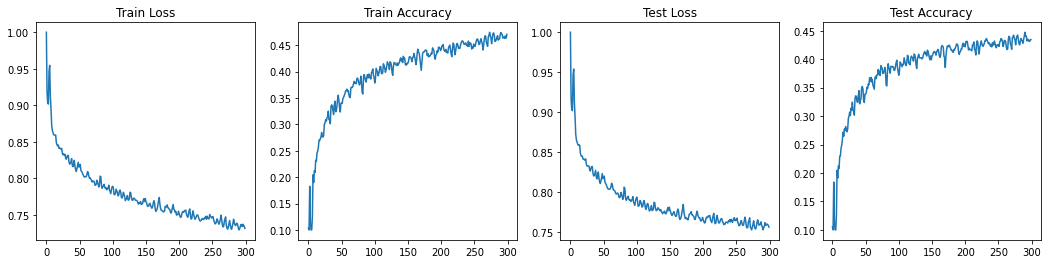

In [5]:
fig,ax = plt.subplots(1,4,figsize=(18,4))
ax[0].plot(loss_history)
ax[0].set_title('Train Loss')
#ax[0].set_xticks([]),ax[0].set_yticks([])
#ax[0].set_ylim(0.75,1.005)

ax[1].plot(train_acc_history)
ax[1].set_title('Train Accuracy')
#ax[1].set_xticks([]),ax[1].set_yticks([])
#ax[1].set_ylim(-0.12,0.02)


ax[2].plot(val_loss_history)
ax[2].set_title('Test Loss')
#ax[1].set_xticks([]),ax[1].set_yticks([])
#ax[1].set_ylim(-0.12,0.02)


ax[3].plot(val_acc_history)
ax[3].set_title('Test Accuracy')
#ax[1].set_xticks([]),ax[1].set_yticks([])
#ax[1].set_ylim(-0.12,0.02)
plt.show()

In [10]:
w1.shape


(3072, 200)

In [7]:
w2.shape

(200, 10)

# Display the weights matrix

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

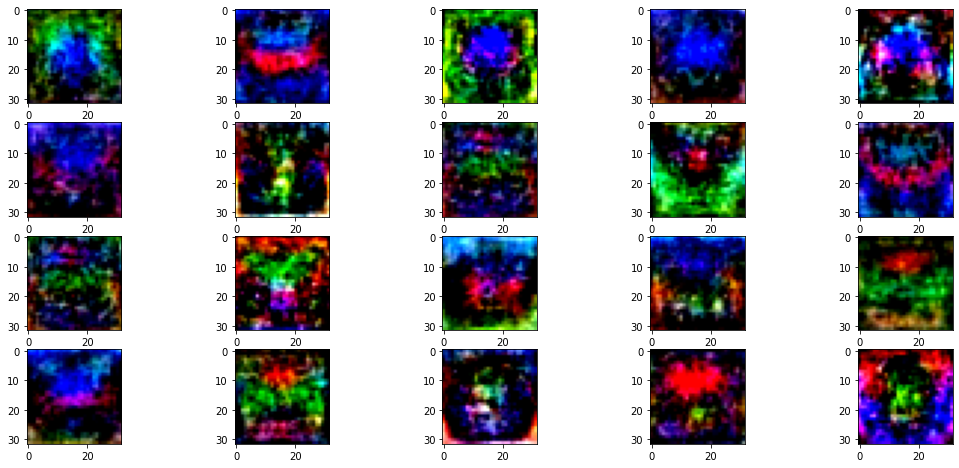

In [8]:
fig = plt.figure(figsize=(18,8))

for i in range(20):
    plt.subplot(4,5,i+1)
    img = w1[:,i].reshape(32,32,3)
    plt.imshow(img*1000)


plt.show()


In [13]:
x_t = x_train
print('x_train->',x_t.shape)
a = x_t.dot(w1)+b1
h = 1.0/(1+np.exp(-a))
y_pred = h.dot(w2)+b2

train_acc = 1/Ntr*(np.abs(np.argmax(y_train,axis=1)==np.argmax(y_pred,axis=1))).sum()
print('train_acc = ',train_acc)


x_t = x_test
print('x_test->',x_t.shape)
a = x_t.dot(w1)+b1
h = 1.0/(1+np.exp(-a))
y_pred = h.dot(w2)+b2

test_acc = 1/Nte*(np.abs(np.argmax(y_test,axis=1)==np.argmax(y_pred,axis=1))).sum()
print('test_acc = ',test_acc)

x_train-> (50000, 3072)
train_acc =  0.46354000000000006
x_test-> (10000, 3072)
test_acc =  0.4329
